In [1]:
import sys
sys.path.append('../..')

In [2]:
import torch

if torch.cuda.is_available():
    device = 'cuda'
if torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

In [3]:
from src.tool.registry import DATASET_REGISTRY

dataset = DATASET_REGISTRY['Footprint2Pressure_Blend_SensorStack'](
    device = device,
    footprint_wrap_folder = '../../data/processed/footprint-wrap/',
    pedar_dynamic_path = '../../data/processed/pedar_dynamic.pkl',
    l_mask_path = '../../data/processed/left_foot_mask.png',
    sense_range = 600,
    stack_range = 50,
    img_size = 10,
)

In [4]:
(img_stack, young), pedar_gt = dataset.__getitem__(3)
img_stack.shape, young.shape, pedar_gt.shape

(torch.Size([198, 10, 10]), torch.Size([]), torch.Size([198]))

In [6]:
from src.tool.registry import MODEL_REGISTRY

model = MODEL_REGISTRY['MLP_cos_emb'](
    device = device,
    img_size = 10,
    pos_emb_len = 512,
    young_emb_len = 128,
    hidden = 2048,
)
model.load_state_dict(torch.load('../../experiment/mlp-0620/model.pth'))
pedar_pred = model((img_stack, young))

pred_std	0.04300890490412712	pred_mean	0.09206197410821915
gt_std		0.04995131492614746	gt_mean		0.11489186435937881


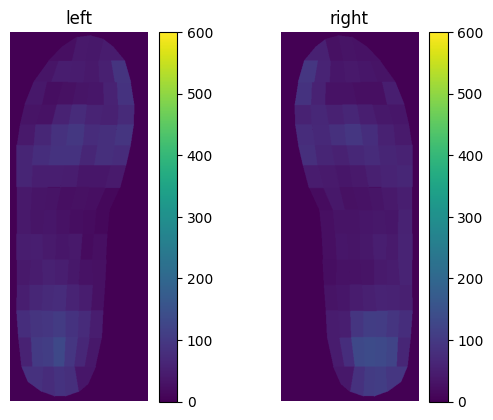

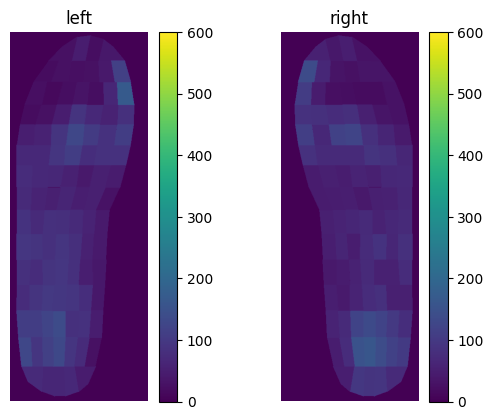

In [7]:
from src.tool import visual

print(f'pred_std\t{pedar_pred.std().item()}\tpred_mean\t{pedar_pred.mean().item()}')
print(f'gt_std\t\t{pedar_gt.std().item()}\tgt_mean\t\t{pedar_gt.mean().item()}')

visual.draw_heatmap(pedar_pred.cpu().detach().numpy() * 600, '../../data/processed/left_foot_mask.png')
visual.draw_heatmap(pedar_gt.cpu().detach().numpy() * 600, '../../data/processed/left_foot_mask.png')

In [8]:
from src.tool.registry import LOSS_REGISTRY

loss_fn = LOSS_REGISTRY['MSELoss']()
loss_fn(pedar_pred, pedar_gt)

tensor(0.0014, device='mps:0', grad_fn=<MseLossBackward0>)

young's modulus - 1.00 (MPa)


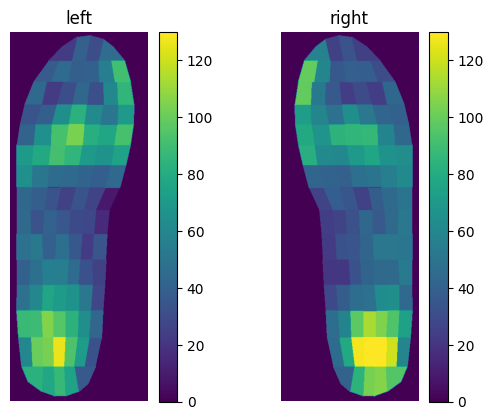

young's modulus - 1.50 (MPa)


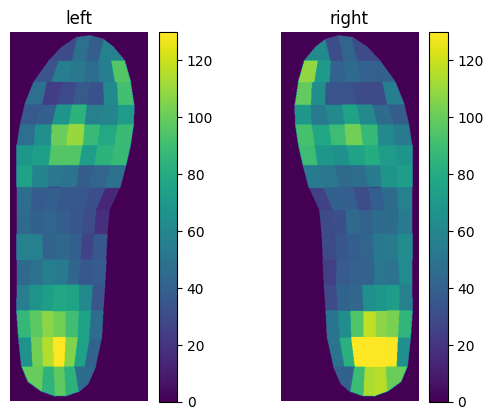

young's modulus - 2.00 (MPa)


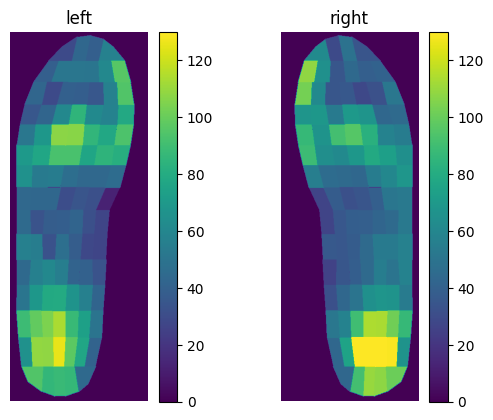

young's modulus - 2.50 (MPa)


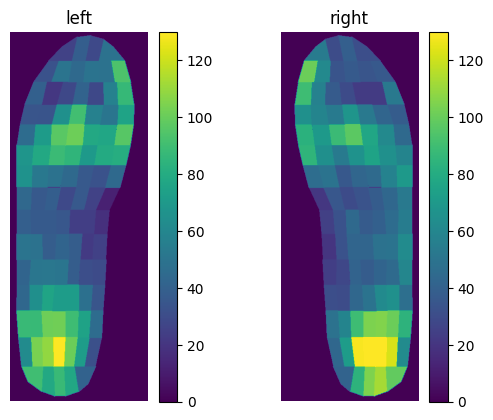

young's modulus - 3.00 (MPa)


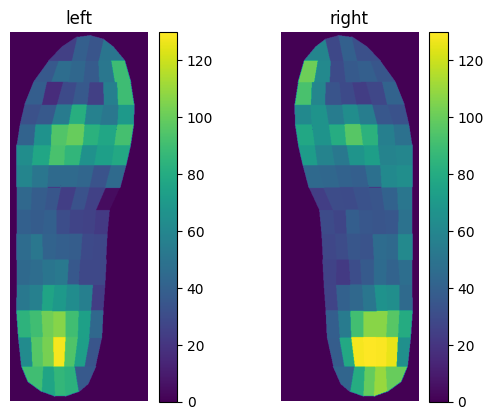

young's modulus - 3.50 (MPa)


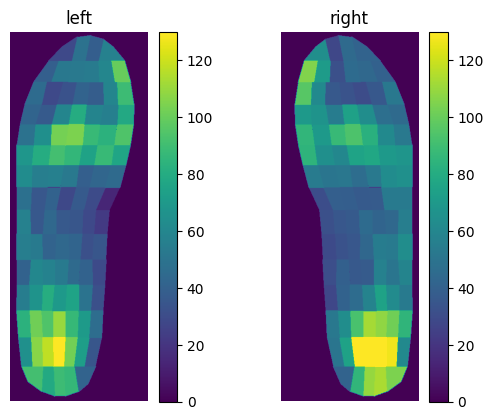

young's modulus - 4.00 (MPa)


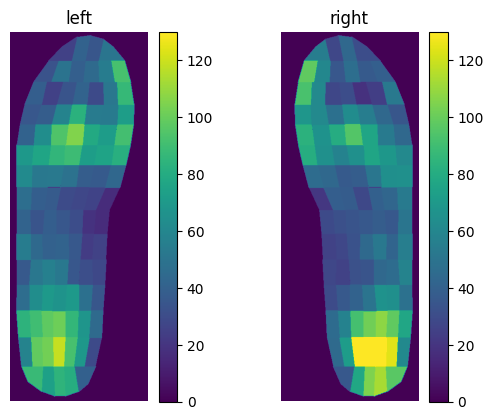

young's modulus - 4.50 (MPa)


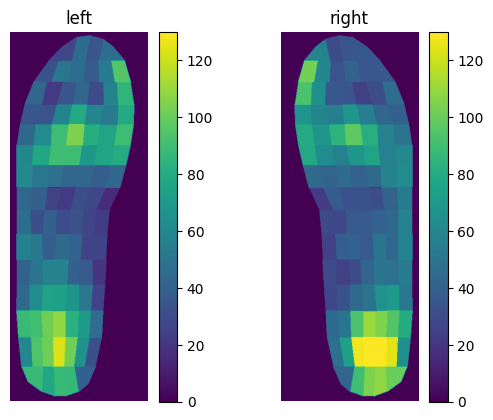

In [48]:
import numpy as np

for idx in np.arange(1.0, 5.0, 0.5):
    pedar_pred = model((img_stack, torch.tensor(idx, dtype=torch.float32).to(device)))
    print(f"young's modulus - {idx:.2f} (MPa)")
    visual.draw_heatmap(pedar_pred.cpu().detach().numpy() * 600, '../../data/processed/left_foot_mask.png', vmax=130)

young's modulus - diff(2.00, 1.00) (MPa)


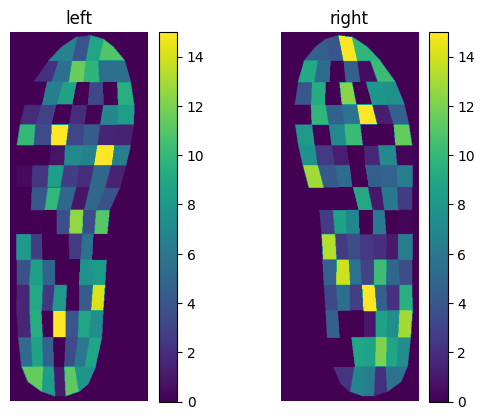

young's modulus - diff(2.50, 1.00) (MPa)


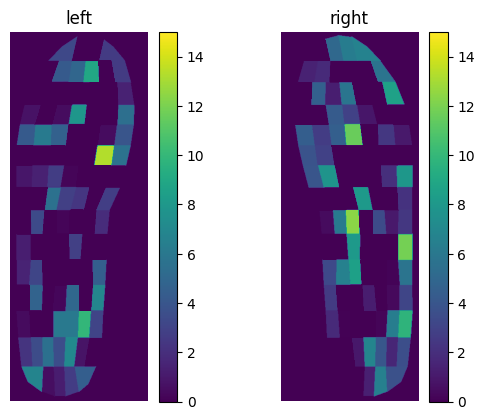

young's modulus - diff(3.00, 1.00) (MPa)


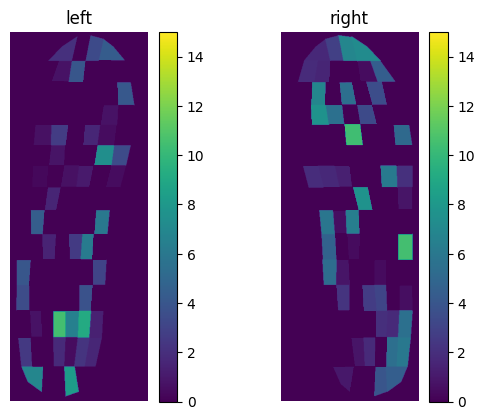

young's modulus - diff(3.50, 1.00) (MPa)


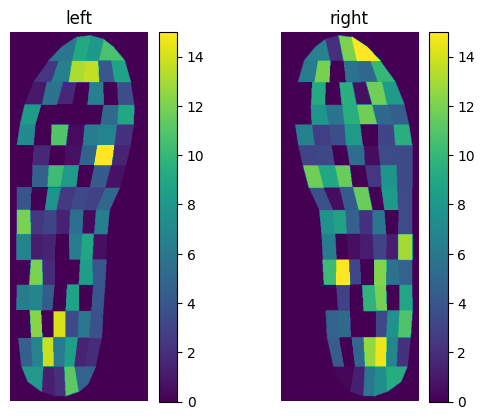

young's modulus - diff(4.00, 1.00) (MPa)


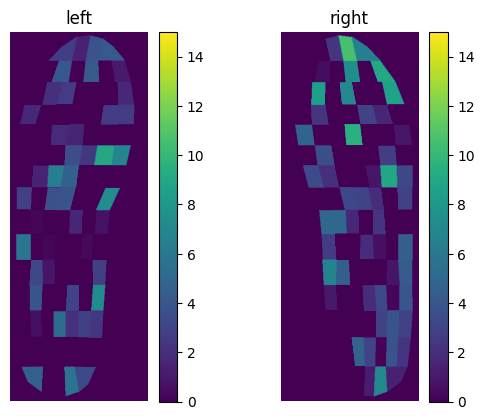

young's modulus - diff(4.50, 1.00) (MPa)


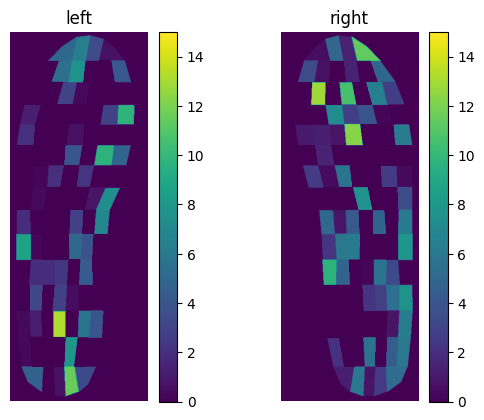

In [49]:
pedar_pred0 = model((img_stack, torch.tensor(1.0).to(device)))

for idx in np.arange(2.0, 5.0, 0.5):
    pedar_pred1 = model((img_stack, torch.tensor(idx, dtype=torch.float32).to(device)))
    print(f"young's modulus - diff({idx:.2f}, {1:.2f}) (MPa)")
    visual.draw_heatmap((pedar_pred1 - pedar_pred0).cpu().detach().numpy() * 600, '../../data/processed/left_foot_mask.png', vmax=15)